## Problem Defination
To predict the price of the motorcycle


## Data Description

The dataset is downloaded from kaggle: https://www.kaggle.com/nehalbirla/motorcycle-dataset

* name
* selling price
* year
* seller type
* owner
* km driven
* ex showroom price


In [33]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestRegressor

## 1. Import Data

In [2]:
df = pd.read_csv("dataset/BIKE DETAILS.csv")

# explore top 5
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [3]:
# explore last 5
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [4]:
# describe
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


## Dtale library

In [6]:
# !pip install dtale


In [7]:
import dtale

In [8]:
dtale.show(df)

## Exploratory Data Analysis

* Numerical Features
* Categorical Features
* Missing Values 
* Outliers
* Visualization

#### Numerical Featues

In [9]:
num_features = [feature for  feature in df.columns if df[feature].dtypes != 'O']

df[num_features].head()

,selling_price,year,km_driven,ex_showroom_price
0,175000,2019,350,NaN
1,45000,2017,5650,NaN
2,150000,2018,12000,148114.0
3,65000,2015,23000,89643.0
4,20000,2011,21000,NaN


#### Categorical Features

In [10]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

df[cat_features].head()

,name,seller_type,owner
0,Royal Enfield Classic 350,Individual,1st owner
1,Honda Dio,Individual,1st owner
2,Royal Enfield Classic Gunmetal Grey,Individual,1st owner
3,Yamaha Fazer FI V 2.0 [2016-2018],Individual,1st owner
4,Yamaha SZ [2013-2014],Individual,2nd owner


#### Missing Values

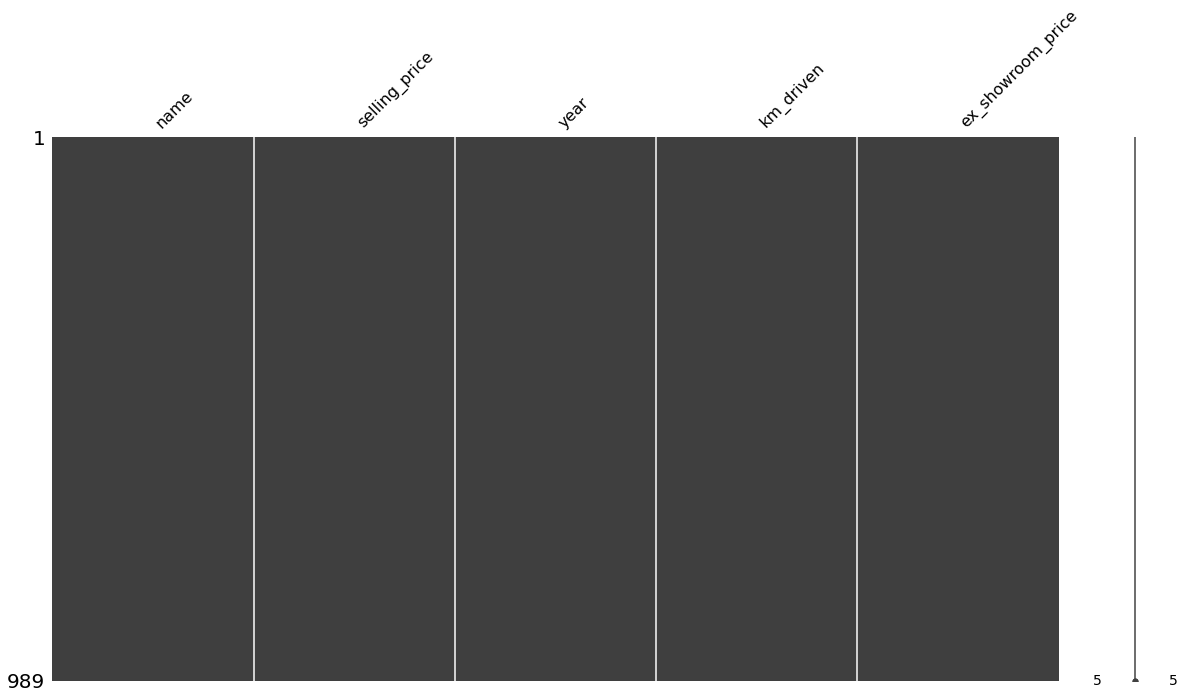

In [34]:
missingno.matrix(df, figsize=(20,10))
plt.show();

#### Ouliers

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
df[df['selling_price']>133000],
df[df['year']<2002],
df[df['km_driven']>87250],
df[df['ex_showroom_price']>135300.75]



,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0
18,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,23000,148114.0
37,Honda CBR-250R,120000,2016,Individual,1st owner,16000,202310.0
70,Mahindra Mojo XT300,165000,2017,Individual,1st owner,1933,195500.0
74,Royal Enfield Thunderbird 350X,165000,2019,Individual,1st owner,3700,164004.0
87,Royal Enfield Classic Gunmetal Grey,140000,2018,Individual,1st owner,22000,148114.0
104,Royal Enfield Classic Desert Storm,150000,2017,Individual,1st owner,16500,181445.0
121,UM Renegade Commando,160000,2018,Individual,1st owner,7000,180525.0
122,Royal Enfield Classic Gunmetal Grey,135000,2018,Individual,1st owner,6100,148114.0


In [14]:
## Indexes to be removed

indexes = [2, 13, 18, 37, 70, 74, 87, 104, 121, 122, 134, 136, 137, 143, 161, 208, 213, 252, 262, 286, 289, 291, 298, 295,
          311, 332, 344, 356, 378, 394, 409, 411, 421, 442, 449, 471, 542, 588, 627, 700, 818, 860, 864, 865, 866, 882, 890,
          891, 897, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 981, 983,
          984, 985]


df = df.drop(labels=indexes, axis=0)
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
10,Yamaha FZ16,35000,2015,Individual,1st owner,32000,78712.0


#### Viusalization

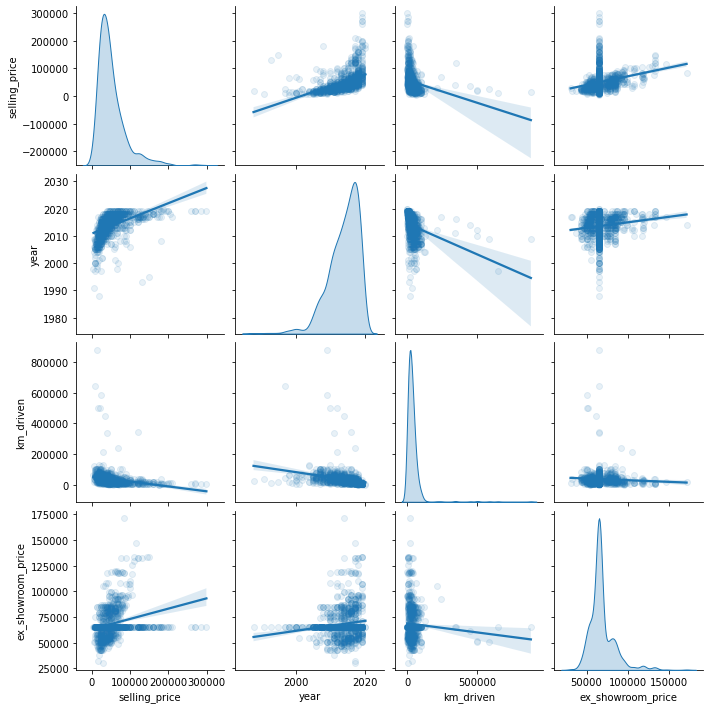

In [35]:
# pairplot
sns.pairplot(df, kind='reg', diag_kind='kde', plot_kws={'scatter_kws':{'alpha':0.1}})
plt.show();

<AxesSubplot:>

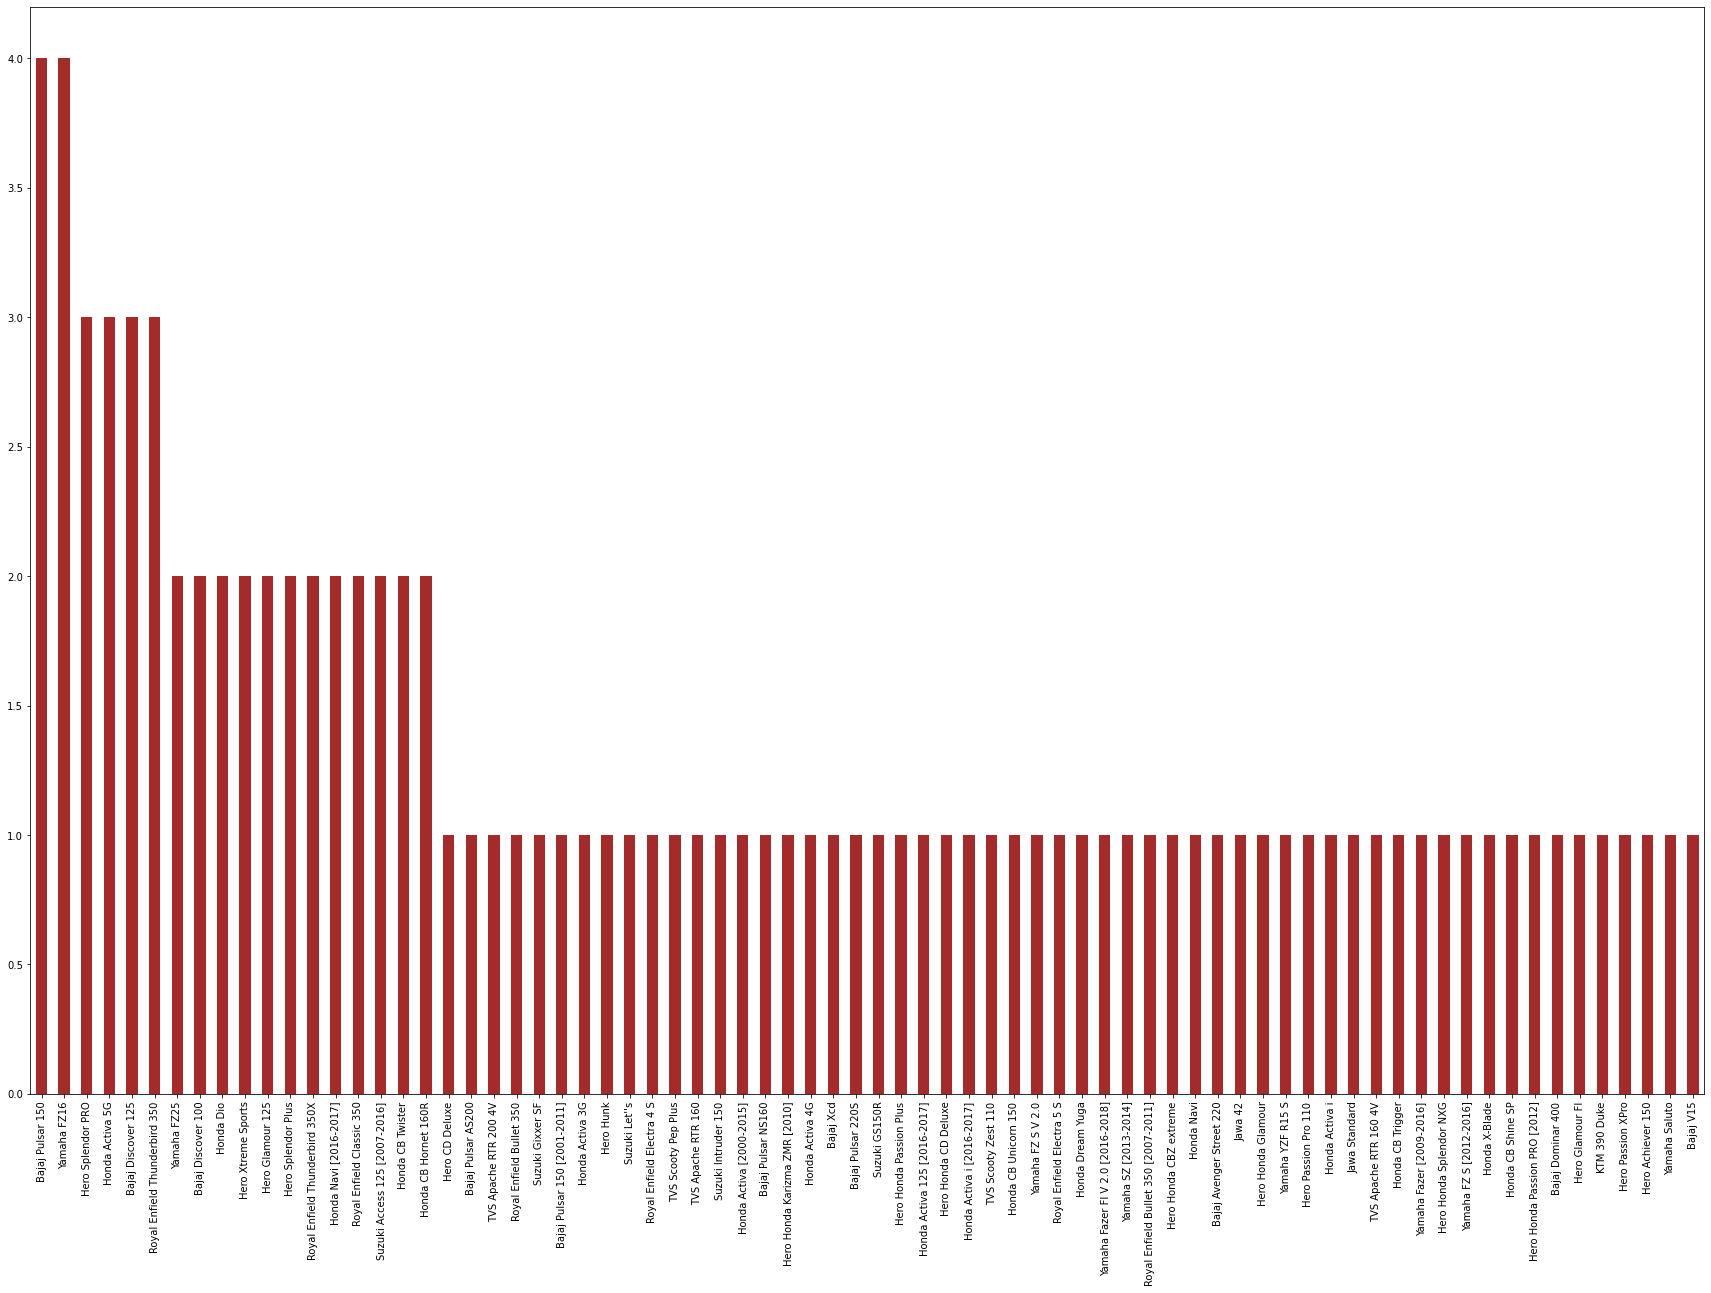

In [36]:
plt.figure(figsize=(30,20))
df['name'][:100].value_counts().plot(kind='bar', color='brown')

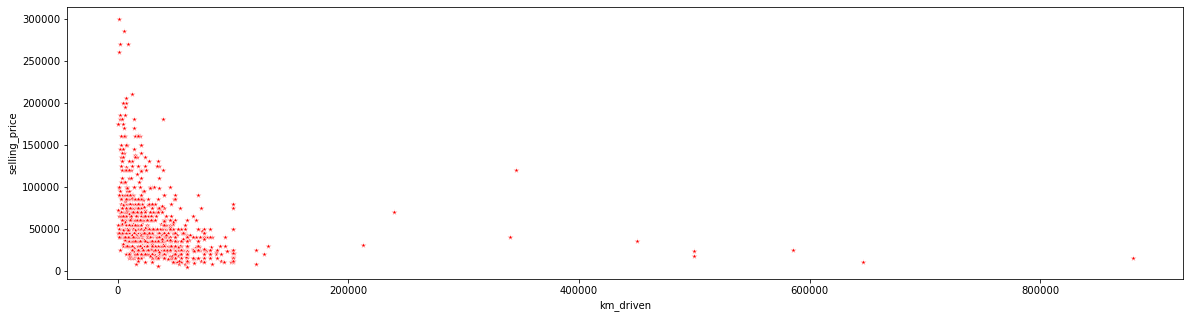

In [37]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['km_driven'], df['selling_price'], marker='*',color='red');

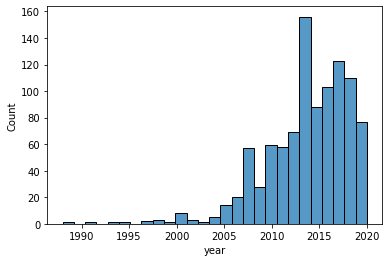

In [38]:
sns.histplot(df['year']);

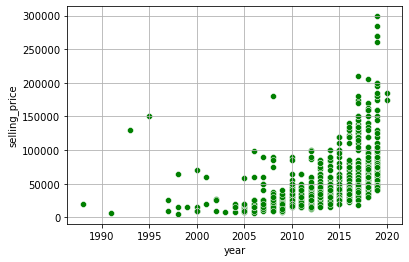

In [39]:
sns.scatterplot(df['year'],df['selling_price'],  color='green');
plt.grid(True)

<AxesSubplot:xlabel='year', ylabel='km_driven'>

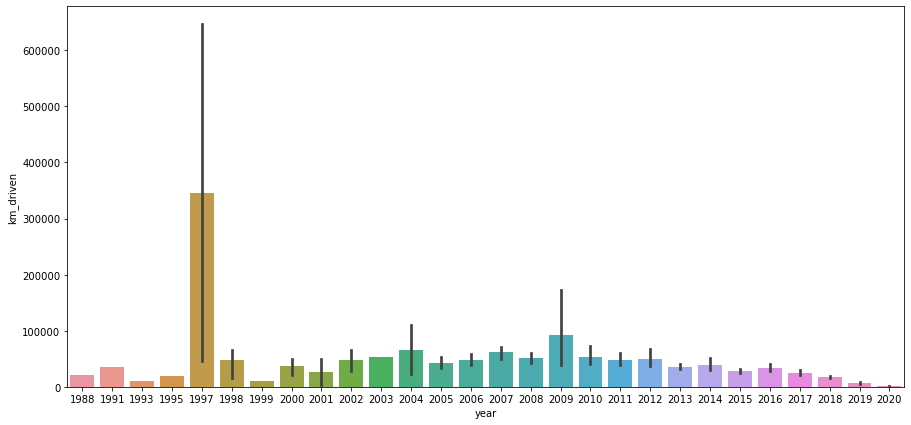

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(df['year'], df['km_driven'])

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

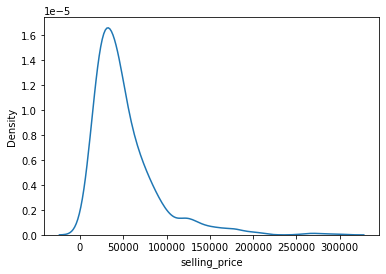

In [41]:
sns.kdeplot(df['selling_price'])

<AxesSubplot:>

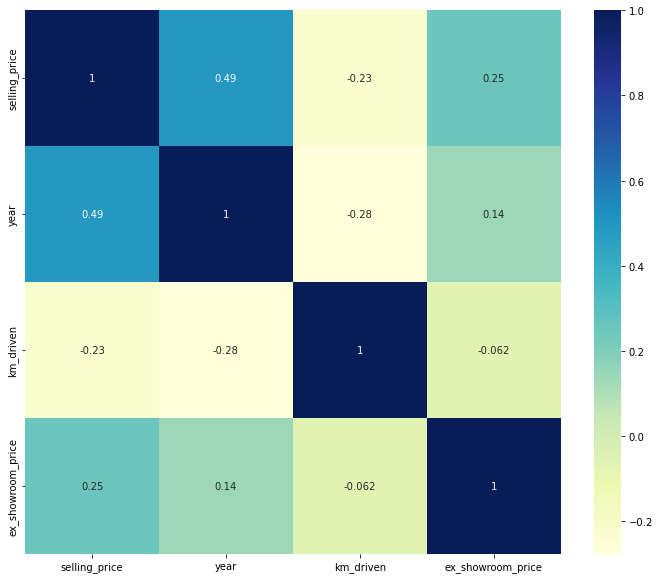

In [42]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,
           annot=True,
           cmap='YlGnBu')

## Handling the missing values

In [23]:
# Filling the missing values with median
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

In [24]:
# Check again any missing values
print(df.isna().sum())
missingno.matrix(df)

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


<AxesSubplot:>

## Converting the categorical features into numerical

In [25]:
cat_features

['name', 'seller_type', 'owner']

In [26]:
df.drop(['seller_type', 'owner'], axis=1, inplace=True)

In [27]:
label_encoder = LabelEncoder()
transformed = label_encoder.fit_transform(df['name'])
transformed

array([164, 140, 229, 238, 130, 126, 163,  68,  20, 224, 147,  11, 151,
       175,  72, 243, 225,  97, 148, 123, 152, 172, 142, 187, 148, 230,
        82,  62, 222, 115, 150, 128, 121,  62,  77, 172,  27,  63, 156,
       100, 221,  55,  20, 224, 240, 224,  16, 129, 167, 106, 121,  78,
        33, 162,  20,  34, 106, 115, 119, 224, 126, 172,  87, 182, 166,
       199, 186,  43,  33, 180,  75, 140,  52, 107, 173, 132, 121, 130,
       106,  69, 124, 201,  58, 175, 122, 118, 176,  41, 120, 225,  33,
       107,  16, 173, 164,  33,  45, 177, 189,  51, 212, 221,  64,   2,
       225,  72,  22,  78, 125, 214, 199, 116, 172, 126, 149,  16,  68,
       164, 121,   9, 165, 119, 119,  35,  68, 126, 154,  89,  62, 164,
        27, 173, 158, 172,  87, 156, 179, 162, 174, 189, 115, 122,  20,
        33, 241,  64, 174,  64, 157, 126,  14,  80,  32, 164, 148,  20,
       236,  24,  33, 193, 215, 237, 136,  18, 164, 122, 167,  33, 149,
       133, 119, 149,  35, 177, 132, 245, 203,  43, 122, 224,  1

## Train Test Split

In [46]:
# dependent and target features
X = df[['year', 'km_driven', 'ex_showroom_price']]
y = df['selling_price']

# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   test_size=0.3,
                                                   random_state=42)

# Check lengths
len(X_train), len(X_test), len(y_train), len(y_test)

(692, 297, 692, 297)

In [47]:
len(df)

989

## Modelling

In [48]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_preds = rfr.predict(X_test)
y_preds
rfr.score(X_test, y_test)

0.4376424836819408

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_preds_gbr = gbr.predict(X_test)
y_preds_gbr

gbr.score(X_test, y_test)

0.5488066297637201

In [52]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_preds_sgd = sgd.predict(X_test)
sgd.score(X_test, y_test)

-6.324588079857886e+27

In [54]:
!pip install xgboost


  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [55]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.34102753480581305